In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay 
from sklearn.model_selection import train_test_split

In [27]:
df = pd.read_csv("preprocessed_dataset.csv")

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['month'] = df['trans_date_trans_time'].dt.month
winter_months = [10, 11, 12, 1, 2, 3]
summer_months = [4, 5, 6, 7, 8, 9]
df['winter'] = df['month'].apply(lambda x: 1 if x in winter_months else 0)
df['summer'] = df['month'].apply(lambda x: 1 if x in summer_months else 0)

services = ['food_dining', 'travel', 'personal_care', 'health_fitness', 'entertainment']
goods = ['shopping_pos', 'grocery_net', 'shopping_net', 'grocery_pos', 'gas_transport', 'misc_pos', 'misc_net', 'kids_pets', 'home']
df['Service'] = df['category'].apply(lambda x: 1 if x in services else 0)
df['Goods'] = df['category'].apply(lambda x: 1 if x in goods else 0)

df = df[['line_number', 'winter', 'summer', 'Service', 'Goods']]
df.to_csv('winter_summer_service_goods.csv', index=False)

In [28]:
X = df[['winter', 'summer']]
y = df['Service']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82      3157
           1       0.00      0.00      0.00      1392

    accuracy                           0.69      4549
   macro avg       0.35      0.50      0.41      4549
weighted avg       0.48      0.69      0.57      4549



c:\Users\jarne\OneDrive - UC Leuven-Limburg\BAC 3\Semester 1\Data Mining\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jarne\OneDrive - UC Leuven-Limburg\BAC 3\Semester 1\Data Mining\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jarne\OneDrive - UC Leuven-Limburg\BAC 3\Semester 1\Data Mining\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

In [29]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.69


C:\Users\jarne\AppData\Local\Temp\ipykernel_7604\2166138345.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns, y=feature_importances, palette='viridis')


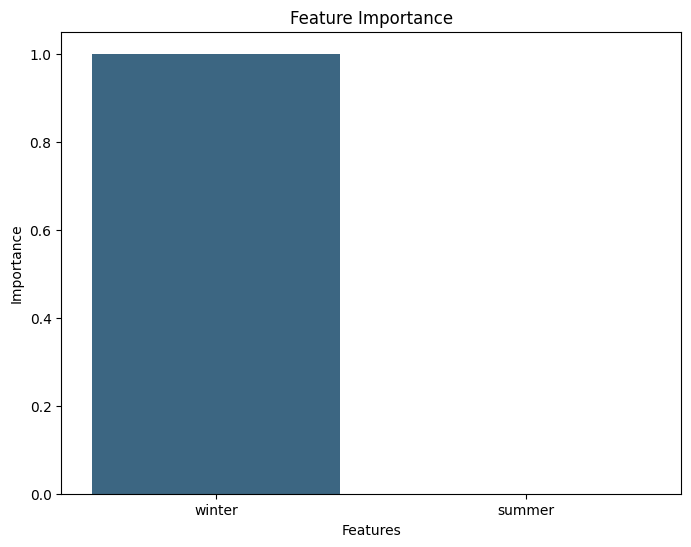

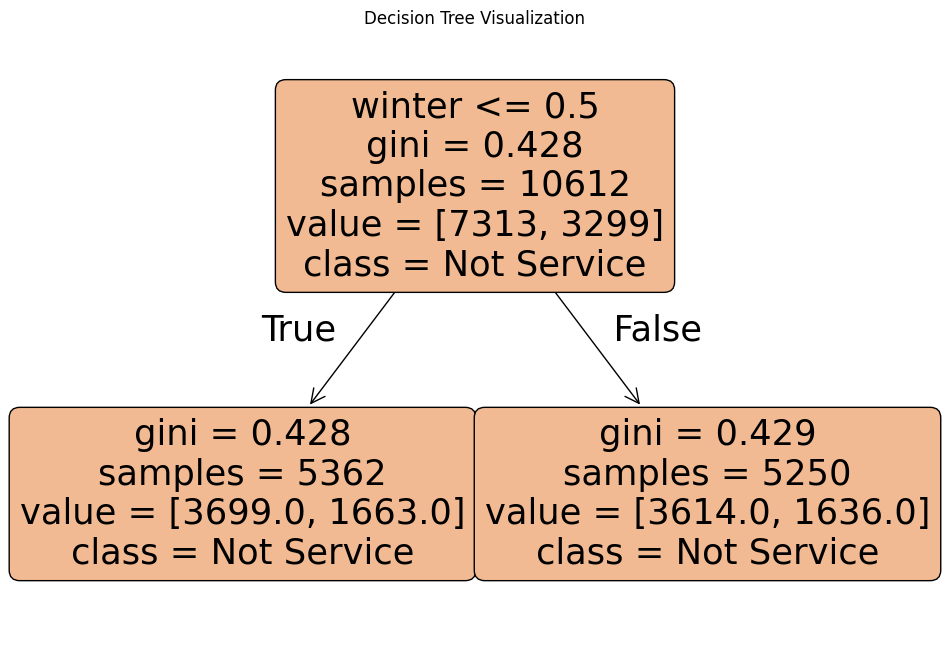

In [30]:
# conf_matrix = confusion_matrix(y_test, y_pred)
# ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot(cmap='Blues')
# plt.title("Confusion Matrix")
# plt.show()

feature_importances = clf.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=X.columns, y=feature_importances, palette='viridis')
plt.title("Feature Importance")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=['Not Service', 'Service'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()